sckit learn에서 mnist 데이터를 불러와 봅니다

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits

digits = load_digits()  

In [2]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [3]:
x = digits.data
y = digits.target

In [4]:
# numpy를 tensor로 변환

x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [5]:
x.size()

torch.Size([1797, 64])

In [6]:
y.size()

torch.Size([1797])

MLP 모델 만들기


In [7]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [8]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = optim.Adam(net.parameters())

In [9]:
net.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)>

In [10]:
x=x.to('cuda')
y=y.to('cuda')
net = net.to('cuda')

학습

In [11]:
import tqdm

epoch = 100
losses = []
for i in tqdm.tqdm(range(epoch)):
  optimizer.zero_grad() # gradient 계산 초기화

  y_pred = net(x) # 예측, batch없이 한번에 한 예제임

  # Loss function 계산
  loss = loss_fn(y_pred, y)
  loss.backward()   #backpropagation

  optimizer.step()  #weight update
  
  losses.append(loss.item()) # loss 기록



100%|██████████| 100/100 [00:00<00:00, 407.14it/s]


In [12]:
losses

[2.5916833877563477,
 2.498253345489502,
 2.4220268726348877,
 2.3603596687316895,
 2.310235023498535,
 2.268507719039917,
 2.2327606678009033,
 2.2013397216796875,
 2.1728060245513916,
 2.1458323001861572,
 2.1200172901153564,
 2.0947558879852295,
 2.0696911811828613,
 2.0448145866394043,
 2.0197010040283203,
 1.9944705963134766,
 1.9689899682998657,
 1.943286657333374,
 1.9175291061401367,
 1.8918449878692627,
 1.8661328554153442,
 1.8402268886566162,
 1.8139699697494507,
 1.7872918844223022,
 1.760221242904663,
 1.7326977252960205,
 1.704798936843872,
 1.6765215396881104,
 1.6480014324188232,
 1.6195048093795776,
 1.5914195775985718,
 1.5637961626052856,
 1.5365662574768066,
 1.5096399784088135,
 1.4826533794403076,
 1.4554260969161987,
 1.4277862310409546,
 1.3996902704238892,
 1.3714065551757812,
 1.3431370258331299,
 1.315019965171814,
 1.2872471809387207,
 1.260023593902588,
 1.2331786155700684,
 1.2066248655319214,
 1.1801999807357788,
 1.1539679765701294,
 1.1279467344284058,


In [13]:
pred_y = net(x)

In [14]:
type(pred_y)

torch.Tensor

In [15]:
pred_y.device

device(type='cuda', index=0)

In [18]:
pred_y = pred_y.detach().to('cpu').numpy()

In [19]:
pred_y.shape

(1797, 10)

In [20]:
import numpy as np
pred_y = np.argmax(pred_y, 1)

In [21]:
pred_y.shape

(1797,)

In [26]:
true_y = y.to('cpu').numpy()

In [27]:
import pandas as pd

yy = pd.DataFrame({'pred_y':pred_y, 'true_y':true_y})

In [28]:
yy

,pred_y,true_y
0,0,0
1,1,1
2,1,2
3,3,3
4,4,4
...,...,...
1792,9,9
1793,0,0
1794,8,8
1795,9,9


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(true_y, pred_y)

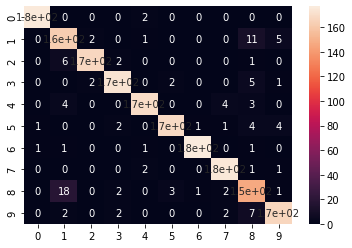

In [32]:
sns.heatmap(cf_matrix, annot=True)